$\textbf{DS169 - INTERNET OF THINGS} \\ \texttt{ 2T SY2425}$ 
# <CENTER> Sensor Activity

<CENTER> <i> Carreon &nbsp &nbsp |&nbsp &nbsp  Lucas &nbsp &nbsp |&nbsp &nbsp San Juan

# Introduction

## Dataset Source

Human Activity Recognition with Smartphones: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones?select=train.csv

## About the Dataset

Thirty participants wearing a smartphone (Samsung Galaxy S II) on the waist do activities of daily life (ADL). Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. Dataset has been split into a 80: 20 train test csv file.

## Objective

Classify activities from one out of six movements: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING

# Data Preprocessing

## Imports

In [1]:
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

## Data Loading and Preview

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Displaying first 5 rows of train dataframe
train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
is_null_train = train.isnull().values.any()
print(f"Does the train dataset contain any null values?: {is_null_train}")

Does the train dataset contain any null values?: False


In [6]:
#Displaying first 5 rows of test dataframe
test.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.720009              0.276801             -0.057978        2   
1             -0.698091              0.281343             -0.083898        2   
2             -0.702771              0.280083             -0.079346        2   
3             -0.698954              0.284114             -0.077108        2   
4             -0.692245              0.290722             -0.073857        2   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [8]:
is_null_test = test.isnull().values.any()
print(f"Does the test dataset contain any null values?: {is_null_test}")

Does the test dataset contain any null values?: False


## Concatenated Dataframe

In [9]:
df = pd.concat([train, test], ignore_index = True)

In [10]:
df.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [12]:
is_null_df = df.isnull().values.any()
print(f"Does the concatenated dataframe have any null values?: {is_null_df}")

Does the concatenated dataframe have any null values?: False


# Exploratory Data Analysis
Using concatenated dataframe

In [13]:
is_num_row = train.shape[0] + test.shape[0] == df.shape[0]
is_num_col = train.shape[1] == test.shape[1] == df.shape[1]

print(f"Does the concatenated dataframe have the same number of rows when train and test are combined?: {is_num_row}")
print(f"Does the concatenated dataframe have the same number of columns when train and test are combined?: {is_num_col}")

Does the concatenated dataframe have the same number of rows when train and test are combined?: True
Does the concatenated dataframe have the same number of columns when train and test are combined?: True


In [14]:
df.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count       10299.000000       10299.000000       10299.000000   
mean            0.274347          -0.017743          -0.108925   
std             0.067628           0.037128           0.053033   
min            -1.000000          -1.000000          -1.000000   
25%             0.262625          -0.024902          -0.121019   
50%             0.277174          -0.017162          -0.108596   
75%             0.288354          -0.010625          -0.097589   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.607784         -0.510191         -0.613064         -0.633593   
std            0.438694          0.500240          0.403657          0.413333   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.992360         -0.976990         -0.979137         -0.993293   
50%           -0.943030         -0.835032         -0.850773         -0.948244   
75%           -0.250293         -0.057336         -0.278737         -0.302033   
max            1.000000          1.000000          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count      10299.000000      10299.000000      10299.000000  ...   
mean          -0.525697         -0.614989         -0.466732  ...   
std            0.484201          0.399034          0.538707  ...   
min           -1.000000         -1.000000         -1.000000  ...   
25%           -0.977017         -0.979064         -0.935788  ...   
50%           -0.843670         -0.845068         -0.874825  ...   
75%           -0.087405         -0.288149         -0.014641  ...   
max            1.000000          1.000000          1.000000  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                     10299.000000                     10299.000000   
mean                         -0.298592                        -0.617700   
std                           0.320199                         0.308796   
min                          -1.000000                        -1.000000   
25%                          -0.536174                        -0.841847   
50%                          -0.335160                        -0.703402   
75%                          -0.113167                        -0.487981   
max                           1.000000                         1.000000   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                 10299.000000                          10299.000000   
mean                      0.007705                              0.002648   
std                       0.336591                              0.447364   
min                      -1.000000                             -1.000000   
25%                      -0.124694                             -0.287031   
50%                       0.008146                              0.007668   
75%                       0.149005                              0.291490   
max                       1.000000                              1.000000   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                      10299.000000                          10299.000000   
mean                           0.017683                             -0.009219   
std                            0.616188                              0.484770   
min                           -1.000000                             -1.000000   
25%                           -0.493108                             -0.389041   
50%                            0.017192                             -0.007186   
75%                            0.536137                              0.365996   
max                            1.000000                     

#### Data Provided by Each User

The bar chart depicts the distribution of data given by each user across several activity categories. The x-axis indicates individual users, while the y-axis represents the number of data points supplied. Each colors symbolize different activities, which are as follows: standing, sitting, laying, walking, walking_downstairs, and walking_upstairs. 

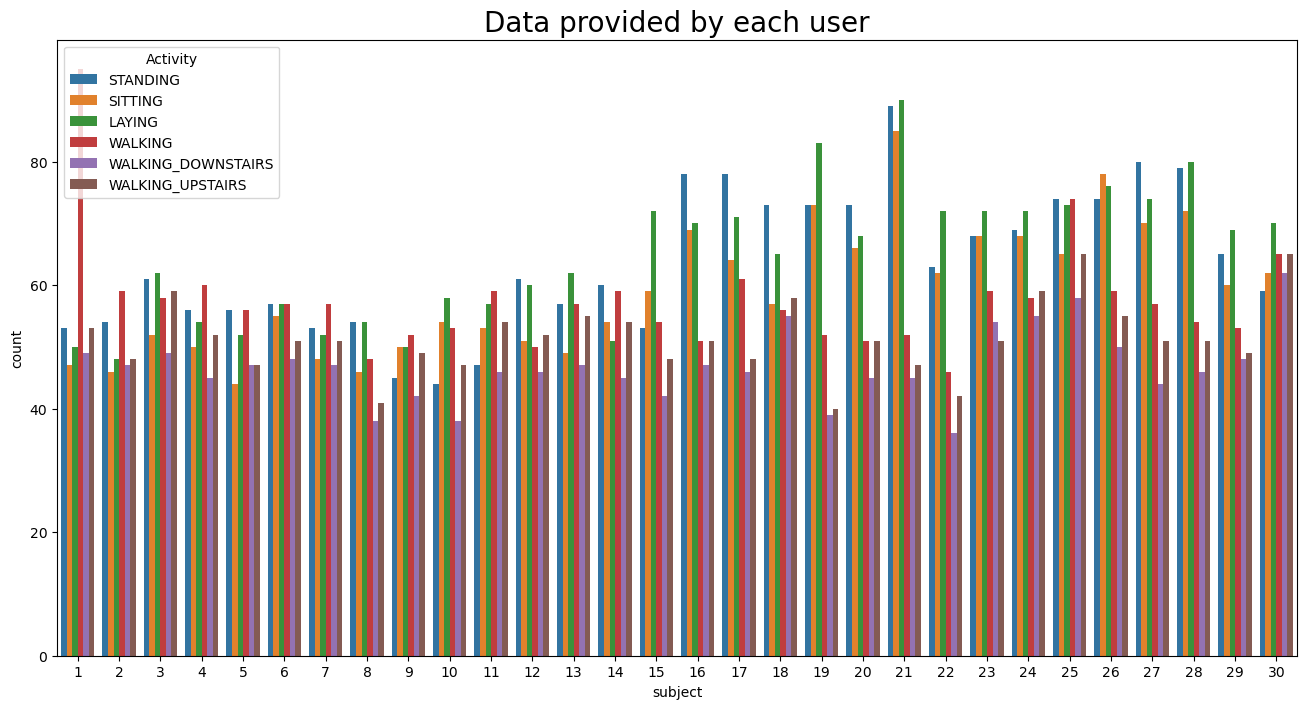

In [15]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df)
plt.show()

#### Activity Distribution in Dataset

The bar chart shows the distribution of activity in the dataset. The x-axis indicates the categorial activity, while the y-axis shows the number of data points or the count gathered per activity. It can be observed that laying has the highest count of activity distribution corresponding that the activities made by the user are largerly scoping to laying than walking downstairs that accumulates the lowest count of activity. 

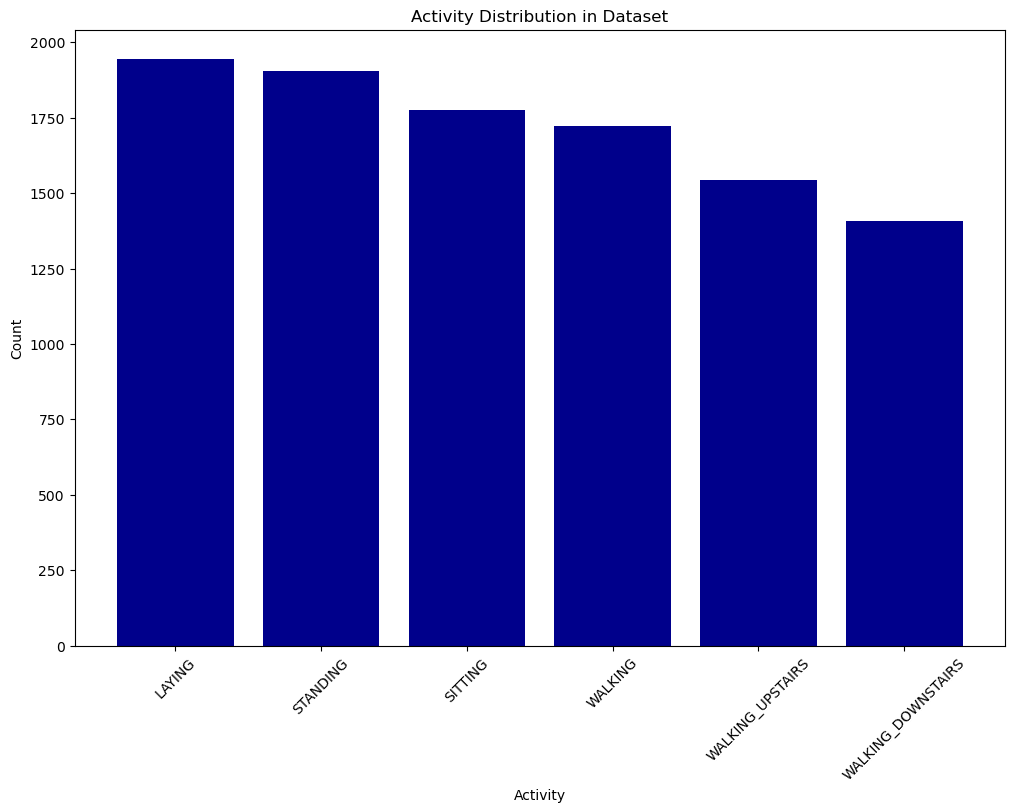

In [16]:
activity_counts = df["Activity"].value_counts()

plt.figure(figsize=(12, 8))
plt.bar(activity_counts.index, activity_counts.values, color= "#00008B" )
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Distribution in Dataset")
plt.xticks(rotation=45)
plt.show()

### Acceleration in Different Activities

The line graph illustrates the distribution of the tBodyAccMag-mean() in different activities. It can be seen that the static activities (standing, sitting, laying) shows a relatively narrow distribution on the tBodyAccMag-mean() axis, centered between -0.9 and -0.8. The high density shows that the acceleration magnitude is constant and modest in these static positions. Meanwhile, for the moving activities (walking, downstairs, upstairs) shows a broader range of tBodyAccMag-mean() values, ranging from around -0.5 to 0.2. This implies that the amplitude of acceleration varies more throughout movement, as is to be expected.

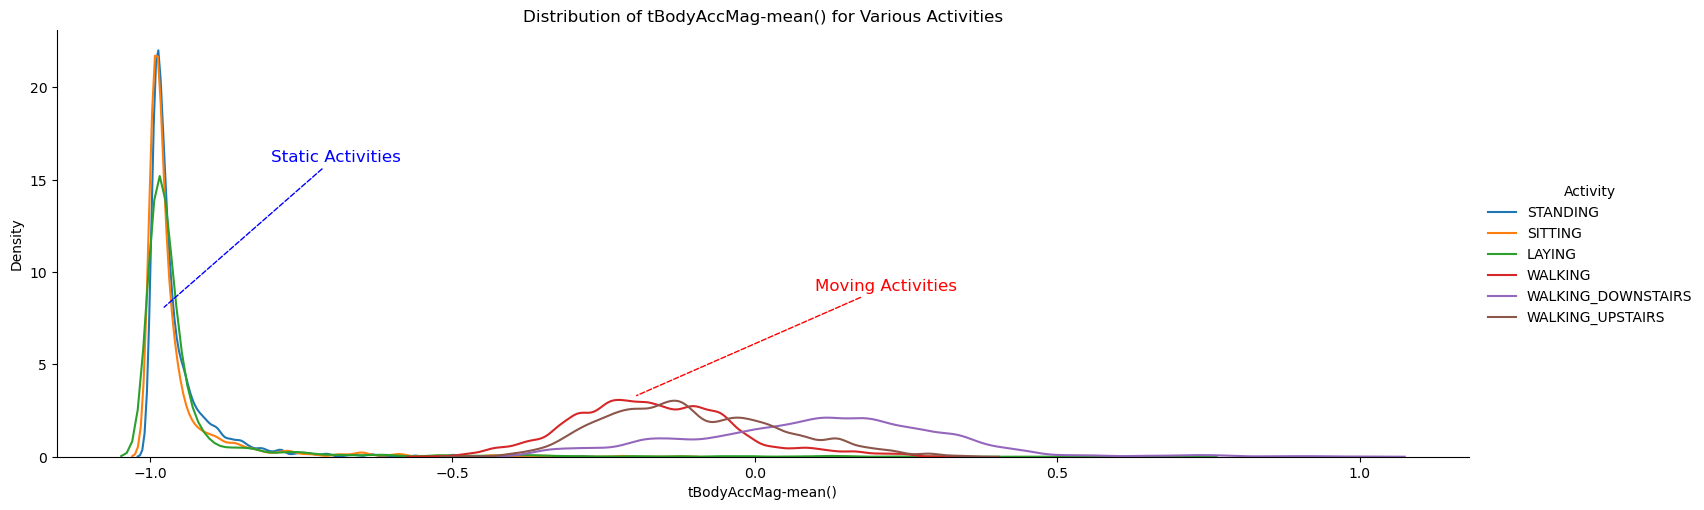

In [17]:
facetgrid = sns.FacetGrid(df, hue='Activity', height=5, aspect=3)
facetgrid.map(sns.kdeplot, 'tBodyAccMag-mean()', bw_adjust=0.5, common_norm=False).add_legend()

# Annotate static activities
plt.annotate("Static Activities", xy=(-0.98, 8), xytext=(-0.8, 16),
             arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'color': 'blue'}, fontsize=12, color='blue')

# Annotate moving activities
plt.annotate("Moving Activities", xy=(-0.2, 3.25), xytext=(0.1, 9),
             arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'color': 'red'}, fontsize=12, color='red')
plt.title("Distribution of tBodyAccMag-mean() for Various Activities")
plt.show()

### Static Activities and Moving Activities Acceleration

It can be observed that, as expected, the moving activities has a larger body acceleration magnitude mean that the static activities. Additionally, the data for moving activities is normally distributed with a long tail.

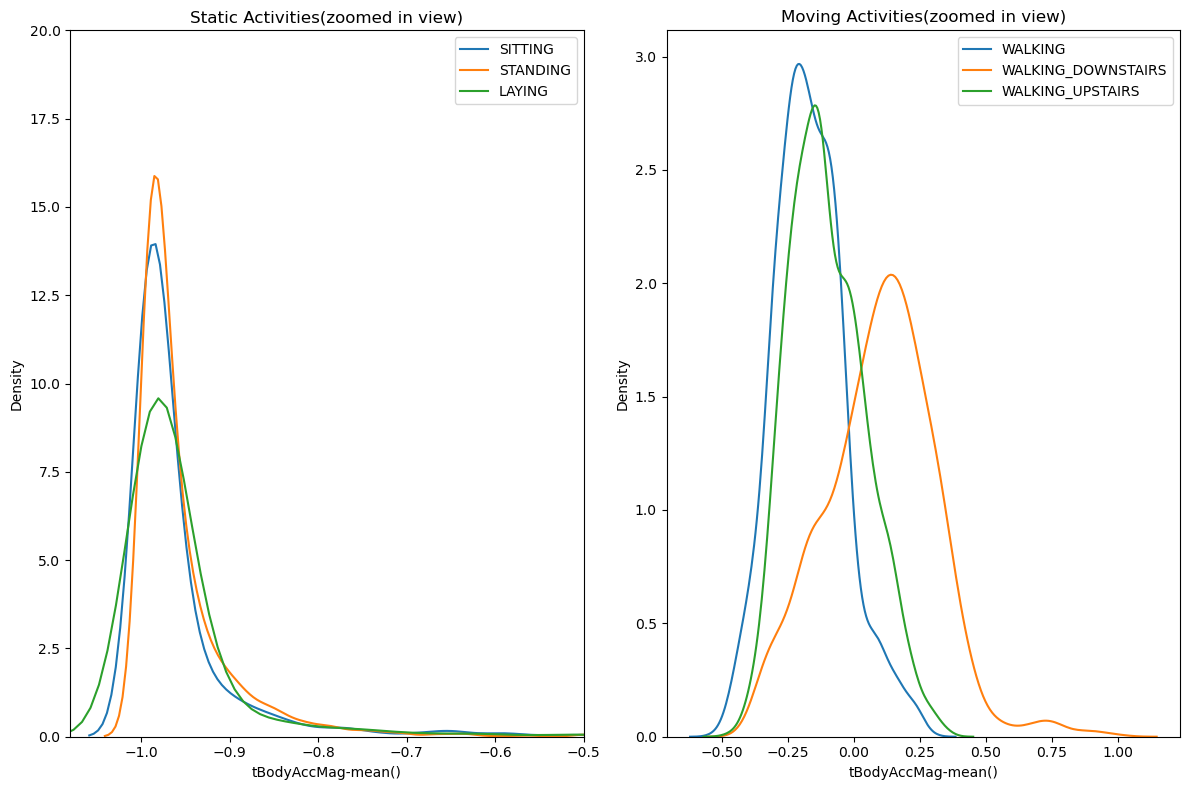

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(zoomed in view)")
sns.distplot(df[df["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'SITTING')
sns.distplot(df[df["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'STANDING')
sns.distplot(df[df["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'LAYING')
plt.axis([-1.08, -0.5, 0, 20])
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.title("Moving Activities(zoomed in view)")
sns.distplot(df[df["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(df[df["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(df[df["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Acceleration Boxplot Across Activities

The box plot shows the analysis of the tBodyAccMag-mean() in different activities which reveals a distinct pattern. Specifically, when the tBodyAccMag-mean() is less than -0.8, the activity is typically one of the following: Standing, Sitting, or Laying. This implies that lower levels of body acceleration are linked with activities in which the users remains relatively immobile. Meanwhile, when the tBodyAccMag-mean() is greater than -0.6, the activities are likely to involve movement, such as Walking, Walking Downstairs, or Walking Upstairs. The variance reflects a slight rise in body acceleration when the individual walks in multiple directions.

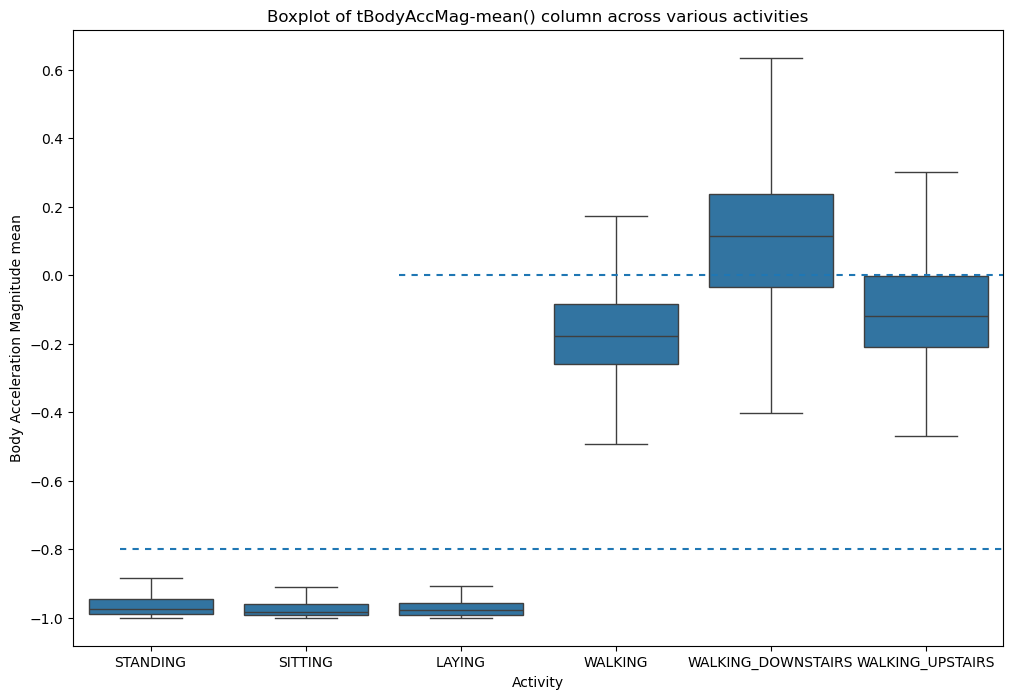

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = df, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.show()

### Gyroscope for Various Activities

The line graph illustrates the distribution of the angle(tBodyGyroMean,gravityMean) in different activities. The static activities have narrow distributions, indicating stable body orientations and the moving activities have larger and more complicated distributions, which represent shifting orientations during motion. It can also be seen in the line graph that the static activities (standing, sitting, laying) are place or ranging on the center axis while the moving activities (walking, walking downstairs, walking upstairs) are in motion between negative and shifting to positive axis. 

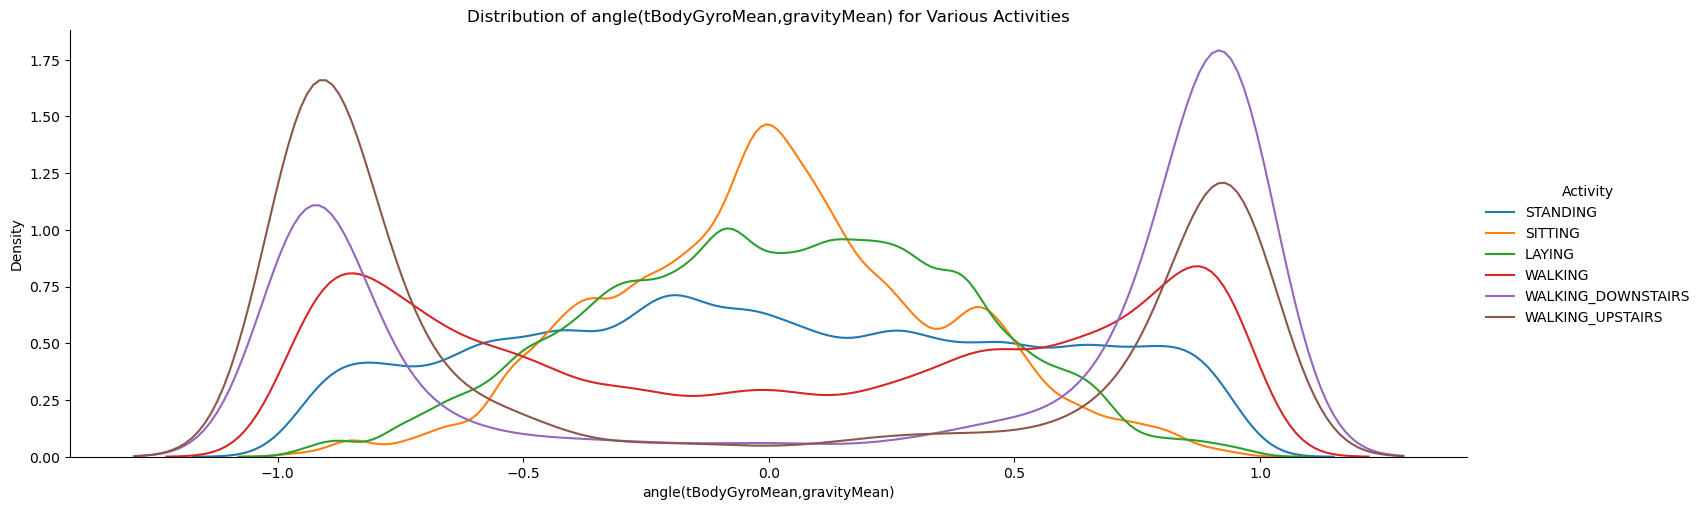

In [20]:
facetgrid = sns.FacetGrid(df, hue='Activity', height=5, aspect=3)
facetgrid.map(sns.kdeplot, 'angle(tBodyGyroMean,gravityMean)', bw_adjust=0.5, common_norm=False).add_legend()

# Annotate static activities
plt.annotate("Static Activities", xy=(-0.98, 8), xytext=(-0.8, 16),
             arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'color': 'blue'}, fontsize=12, color='blue')

# Annotate moving activities
plt.annotate("Moving Activities", xy=(-0.2, 3.25), xytext=(0.1, 9),
             arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'color': 'red'}, fontsize=12, color='red')
plt.title("Distribution of angle(tBodyGyroMean,gravityMean) for Various Activities")
plt.show()

### Static Activities and Moving Activities Gyroscope
The zoomed in line graph for the static activities emphasizes a concentrated movement, implying a consistent body orientation of being still. The distinction between laying, standing, sitting underscores the notion that the angle relative to gravity is a strong indicator of the "lying down" posture. Contrasting to the moving activities, in which it highlights a forward lean in downstairs and the a repetitive pattern in upstairs. 

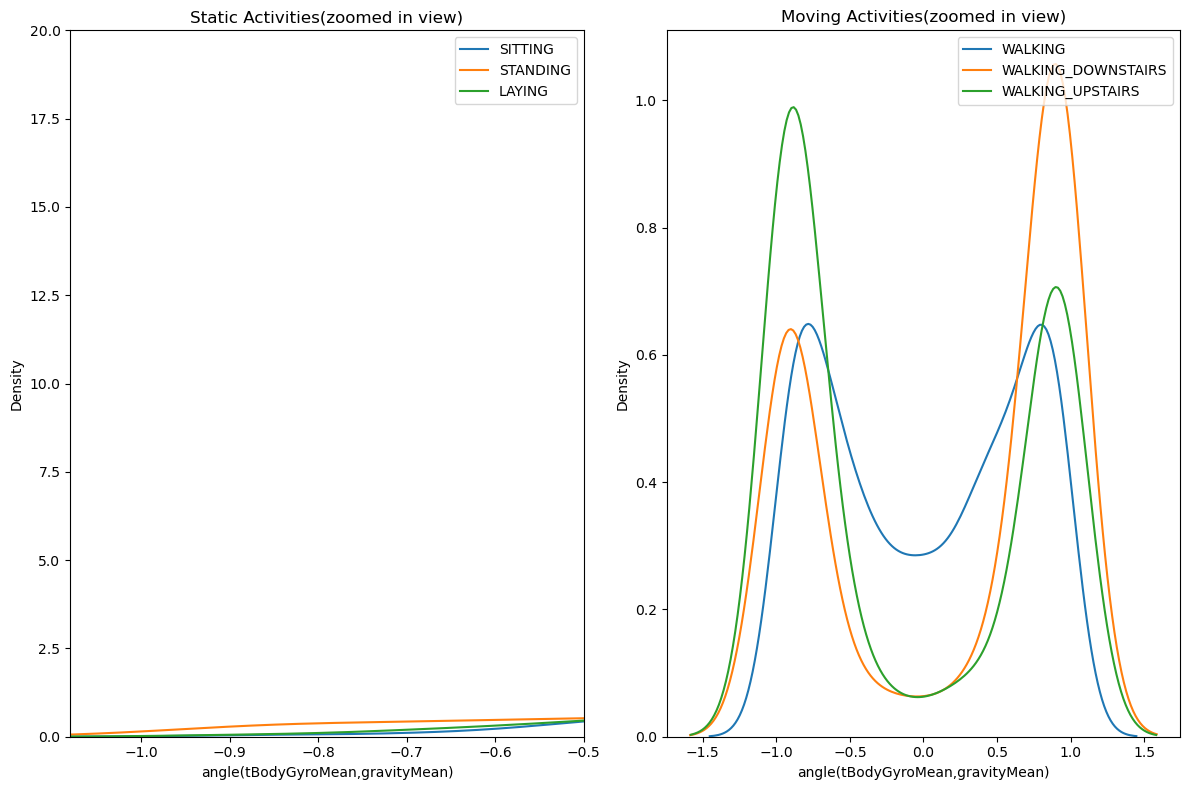

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(zoomed in view)")
sns.distplot(df[df["Activity"]=="SITTING"]['angle(tBodyGyroMean,gravityMean)'],hist = False, label = 'SITTING')
sns.distplot(df[df["Activity"]=="STANDING"]['angle(tBodyGyroMean,gravityMean)'],hist = False,label = 'STANDING')
sns.distplot(df[df["Activity"]=="LAYING"]['angle(tBodyGyroMean,gravityMean)'],hist = False, label = 'LAYING')
plt.axis([-1.08, -0.5, 0, 20])
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.title("Moving Activities(zoomed in view)")
sns.distplot(df[df["Activity"]=="WALKING"]['angle(tBodyGyroMean,gravityMean)'],hist = False, label = 'WALKING')
sns.distplot(df[df["Activity"]=="WALKING_DOWNSTAIRS"]['angle(tBodyGyroMean,gravityMean)'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(df[df["Activity"]=="WALKING_UPSTAIRS"]['angle(tBodyGyroMean,gravityMean)'],hist = False, label = 'WALKING_UPSTAIRS')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Boxplot of Gyroscope Across Activities

The box plot shows the analysis of the angle(tBodyGyroMean,gravityMean) in different activities which reveals a distinct pattern. The static activities shows a less angle fluctuation as compared to moving activities which showcases a closer range to 0. While the moving activites have an increased diveristy of both negative and positive angles. 

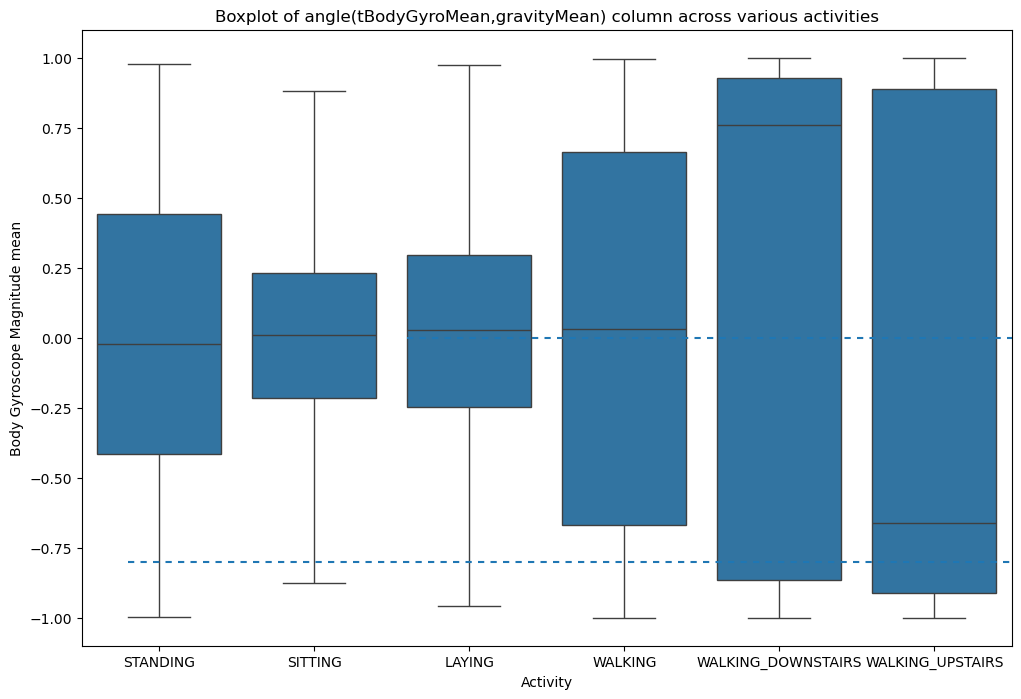

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x = "Activity", y="angle(tBodyGyroMean,gravityMean)", data = df, showfliers = False)
plt.ylabel('Body Gyroscope Magnitude mean')
plt.title("Boxplot of angle(tBodyGyroMean,gravityMean) column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.show()

# Data Processing for Model Training

In [23]:
# Separate features and labels
X_train = train.drop(columns=["Activity", "subject"])
X_test = test.drop(columns=["Activity", "subject"])

y_train = train["Activity"]
y_test = test["Activity"]

In [24]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Feature Selection & Scaling

This sub-section we will utilize Principal Component Analysis to reduce the number of features. This will reduce noise and improve model efficiency.

In [25]:
# Perform PCA and check explained variance
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [26]:
# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
explained_variance_ratio[:20]  # Display first 20 components' cumulative variance

array([0.50781172, 0.57361853, 0.60168289, 0.62672242, 0.64560527,
       0.66284534, 0.67655545, 0.68854623, 0.69850482, 0.70815569,
       0.7167562 , 0.72475901, 0.73239898, 0.73885227, 0.74517551,
       0.75117273, 0.75704023, 0.76279431, 0.76847352, 0.77374648])

In [27]:
# Find the number of components needed for 90% variance
num_components_90 = np.argmax(explained_variance_ratio >= 0.90) + 1  # +1 to convert index to count
num_components_90

63

In [28]:
# Apply PCA with 63 components
pca_90 = PCA(n_components=63)
X_train_pca_90 = pca_90.fit_transform(X_train_scaled)
X_test_pca_90 = pca_90.transform(X_test_scaled)

In [29]:
# Convert back to DataFrame
train_pca_90_df = pd.DataFrame(X_train_pca_90, columns=[f"PC{i+1}" for i in range(63)])
test_pca_90_df = pd.DataFrame(X_test_pca_90, columns=[f"PC{i+1}" for i in range(63)])

In [30]:
# Add back the labels
train_pca_90_df["Activity"] = y_train.values
test_pca_90_df["Activity"] = y_test.values

In [31]:
train_pca_90_df

PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0    -16.138544   2.152024 -3.144780  0.272464 -6.798938 -4.249394  2.937159   
1    -15.296194   1.387144  0.682221 -2.813677 -4.266170 -2.055663  0.011205   
2    -15.137019   2.473351  1.756641 -3.717974 -4.181557 -1.357518  0.072947   
3    -15.350884   3.915681  1.790322 -2.567521 -3.205840 -0.942944  0.530736   
4    -15.544814   4.598737  2.188582 -2.897578 -3.080150 -1.061458 -1.048591   
...         ...        ...       ...       ...       ...       ...       ...   
7347  15.465060 -12.536306 -1.999177 -3.457724  1.523194 -2.699127 -3.561252   
7348  14.222722 -10.253501 -2.377660 -2.802667  1.325313 -4.346117 -2.193966   
7349  14.333436 -12.260712 -4.025946 -3.849780  2.860490 -3.624049 -3.929641   
7350  12.876019 -14.071256 -2.916061 -5.013426  3.938225 -2.137607 -5.390400   
7351  13.016104 -12.244261 -1.336050 -4.215302  1.834859 -2.354388 -5.004069   

           PC8       PC9      PC10  ...      PC55      PC56      PC57  \
0    -4.905413  0.775515  3.627737  ...  1.453239  0.518271  1.069088   
1    -1.845985 -0.492546  0.180175  ...  1.873529  0.104559 -1.380235   
2    -1.388188 -0.539754  0.671712  ... -0.534305 -0.501512  0.472763   
3    -1.832185 -1.071517  1.496989  ...  0.433841  1.314230  0.891354   
4    -0.816933 -0.600063 -1.118875  ... -0.185339 -0.088551  0.414524   
...        ...       ...       ...  ...       ...       ...       ...   
7347  2.418693 -0.383180 -1.308722  ... -1.940167  0.485616  1.889302   
7348  0.032140  0.528929 -0.702509  ... -0.664843  0.364231  0.671005   
7349 -0.873163  0.746331  1.575526  ... -0.072289 -1.147961 -0.090801   
7350  0.321305  0.916300  1.646371  ... -0.926130 -0.483486  1.044304   
7351  2.631376 -0.805713 -0.031563  ... -0.679199  0.216061 -0.032962   

          PC58      PC59      PC60      PC61      PC62      PC63  \
0    -1.015405  0.233400 -0.770759  0.067950  0.382774 -1.078217   
1     0.028460  1.127166 -0.120667  0.233644  0.106987 -0.034963   
2    -0.865773 -0.663759 -1.272343 -0.424568 -1.153452  0.465598   
3    -0.237260 -0.953606 -1.873607 -0.774201 -2.234938  0.801518   
4     0.472276  0.794543 -0.483120  0.062439 -0.764861  0.029698   
...        ...       ...       ...       ...       ...       ...   
7347 -1.103543  0.430878  0.700338  0.050408 -0.913617  0.032421   
7348 -0.866407 -0.232716  1.475086 -0.068610 -0.898508 -0.192581   
7349 -1.334557 -1.336172  0.961825  0.283054 -1.852759 -0.385008   
7350 -1.357101 -0.578386  0.570759  0.000389 -1.520194  0.415937   
7351  0.920679  0.353781  1.006930 -1.477703 -0.436717  0.791355   

              Activity  
0             STANDING  
1             STANDING  
2             STANDING  
3             STANDING  
4             STANDING  
...                ...  
7347  WALKING_UPSTAIRS  
7348  WALKING_UPSTAIRS  
7349  WALKING_UPSTAIRS  
7350  WALKING_UPSTAIRS  
7351  WALKING_UPSTAIRS  

[7352 rows x 64 columns]

## Splitting Dataset (Train, Validation, Test)

In [32]:
# Split the training set into 80% training and 20% validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_pca_90, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [33]:
# Convert back to DataFrame
train_final_df = pd.DataFrame(X_train_final, columns=[f"PC{i+1}" for i in range(63)])
val_df = pd.DataFrame(X_val, columns=[f"PC{i+1}" for i in range(63)])

# Add back the labels
train_final_df["Activity"] = y_train_final.values
val_df["Activity"] = y_val.values

### Displaying Each Set

In [34]:
train_final_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   4.912930 -2.185447  3.929642 -3.321872  2.650290  0.167885  4.750226   
1 -13.478517 -4.607952 -8.373980  6.006729  1.828848  1.690553 -0.875165   
2  13.949386  1.268950  1.944898 -1.132734  1.032205 -2.324394  1.366471   
3 -14.725107  0.282262 -0.534864 -1.291324 -3.357558 -1.527170  0.242143   
4  25.595322  4.472444  2.403912  0.136939  0.815229  4.714845 -3.278989   

        PC8       PC9      PC10  ...      PC55      PC56      PC57      PC58  \
0  0.058888  1.514225  0.662894  ... -0.714055 -0.362298  0.919883 -0.994632   
1 -1.273848  1.650959 -0.243050  ... -0.019896  1.192315  0.491181 -0.403064   
2 -1.432447 -0.723505  1.930863  ...  1.146995 -0.104135 -0.146926  0.504266   
3 -1.127212  1.030831  1.294331  ... -1.084251  0.068713 -0.116129 -0.389307   
4 -0.521608  1.977357 -1.994342  ...  0.838454 -1.210224  1.181779  0.331543   

       PC59      PC60      PC61      PC62      PC63  Activity  
0  0.344214  0.647603  1.251336  1.988017 -0.823568   WALKING  
1 -0.170511  1.637266  0.076123  1.230915 -1.202664    LAYING  
2 -0.977900  1.734972 -0.878544  0.470770 -0.994092   WALKING  
3 -0.166227  0.251785 -0.299797  0.686203  0.015351   SITTING  
4 -0.522411  0.531424  0.850143 -1.978762 -1.372990   WALKING  

[5 rows x 64 columns]

In [35]:
train_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       5881 non-null   float64
 1   PC2       5881 non-null   float64
 2   PC3       5881 non-null   float64
 3   PC4       5881 non-null   float64
 4   PC5       5881 non-null   float64
 5   PC6       5881 non-null   float64
 6   PC7       5881 non-null   float64
 7   PC8       5881 non-null   float64
 8   PC9       5881 non-null   float64
 9   PC10      5881 non-null   float64
 10  PC11      5881 non-null   float64
 11  PC12      5881 non-null   float64
 12  PC13      5881 non-null   float64
 13  PC14      5881 non-null   float64
 14  PC15      5881 non-null   float64
 15  PC16      5881 non-null   float64
 16  PC17      5881 non-null   float64
 17  PC18      5881 non-null   float64
 18  PC19      5881 non-null   float64
 19  PC20      5881 non-null   float64
 20  PC21      5881 non-null   floa

In [36]:
val_df.head()

PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0   6.455266 -11.149880 -0.807152 -0.903910  2.316600  0.445033  4.270292   
1 -15.708984   7.659967  2.598308 -0.820386  1.846186 -1.471559  1.376129   
2  -8.713891 -10.775014 -4.071241 -1.007230 -4.131233  3.970462  2.366494   
3 -15.695368   9.291118 -0.121230  3.140345  6.652211  1.035089  1.797412   
4  23.140631   6.310397 -5.191703 -9.202165  3.304164  6.993103  1.135826   

        PC8       PC9      PC10  ...      PC55      PC56      PC57      PC58  \
0  1.594807 -0.260637  1.076719  ... -0.618706 -0.216932  0.405432  2.495832   
1  1.696720 -2.642627 -1.221125  ... -0.137214  0.720268 -0.223231 -0.735557   
2 -2.855361  0.289200 -1.792186  ... -1.345775 -1.986107  1.716240  0.743580   
3  1.116459 -1.781034 -1.173390  ... -0.186327 -0.712678  1.591591 -2.206288   
4 -0.847738 -1.289103  4.939552  ...  0.120048  0.159299 -1.302553 -0.899121   

       PC59      PC60      PC61      PC62      PC63          Activity  
0  1.527425 -0.649474  2.638717 -0.135117 -1.003901  WALKING_UPSTAIRS  
1 -1.614269 -0.326254 -0.237948  0.180345 -0.347292           SITTING  
2  1.052723 -2.178922 -1.602272  1.223975 -1.077438           SITTING  
3 -0.165423  0.694753  0.069695 -0.445566  0.117874            LAYING  
4 -1.510596 -0.518388  0.288797 -0.400951 -0.294803           WALKING  

[5 rows x 64 columns]

In [37]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       1471 non-null   float64
 1   PC2       1471 non-null   float64
 2   PC3       1471 non-null   float64
 3   PC4       1471 non-null   float64
 4   PC5       1471 non-null   float64
 5   PC6       1471 non-null   float64
 6   PC7       1471 non-null   float64
 7   PC8       1471 non-null   float64
 8   PC9       1471 non-null   float64
 9   PC10      1471 non-null   float64
 10  PC11      1471 non-null   float64
 11  PC12      1471 non-null   float64
 12  PC13      1471 non-null   float64
 13  PC14      1471 non-null   float64
 14  PC15      1471 non-null   float64
 15  PC16      1471 non-null   float64
 16  PC17      1471 non-null   float64
 17  PC18      1471 non-null   float64
 18  PC19      1471 non-null   float64
 19  PC20      1471 non-null   float64
 20  PC21      1471 non-null   floa

In [38]:
#Renaming for consistency
test_final_df = test_pca_90_df 

In [39]:
test_final_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -10.262280 -1.429259 -1.756266 -1.471646 -3.628867 -0.648441  3.422117   
1 -13.070632 -0.862309  0.407785 -2.961993 -3.346329  1.482588 -0.524768   
2 -14.239412  2.576799  2.190182 -2.474236 -2.239261 -0.638699  1.304945   
3 -14.482305  2.087274  1.640800 -2.595560 -2.902612 -1.654429 -0.030258   
4 -13.776189 -1.402332  1.416319 -2.447932 -3.926211  0.220251 -1.200678   

        PC8       PC9      PC10  ...      PC55      PC56      PC57      PC58  \
0 -2.037576 -2.686782 -1.060198  ...  1.131240 -1.516419 -0.489135 -0.280560   
1  0.242094  0.602578 -1.924923  ...  0.440561 -0.297271 -0.965521  0.116919   
2 -1.683838 -2.656168  1.949818  ... -0.715382 -1.110874 -1.646604  0.001005   
3 -1.147152 -1.490350  1.882322  ... -0.682326 -0.425501 -2.168534  0.276098   
4  1.454476 -0.204931 -0.965680  ... -0.366101 -0.650896 -0.142721 -1.447595   

       PC59      PC60      PC61      PC62      PC63  Activity  
0  0.215189  2.344550  0.508406  0.277722 -1.199742  STANDING  
1  0.236690  0.028743 -1.356690  1.412411 -0.315401  STANDING  
2 -0.589507  0.994859 -0.394282  0.614162  0.490195  STANDING  
3 -0.913805  0.811898 -0.181866  0.266876  0.525972  STANDING  
4 -1.061367  0.008550 -0.724683 -0.732546  0.979500  STANDING  

[5 rows x 64 columns]

In [54]:
test_final_df.to_csv("pca_test.csv", index=False)

In [40]:
test_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       2947 non-null   float64
 1   PC2       2947 non-null   float64
 2   PC3       2947 non-null   float64
 3   PC4       2947 non-null   float64
 4   PC5       2947 non-null   float64
 5   PC6       2947 non-null   float64
 6   PC7       2947 non-null   float64
 7   PC8       2947 non-null   float64
 8   PC9       2947 non-null   float64
 9   PC10      2947 non-null   float64
 10  PC11      2947 non-null   float64
 11  PC12      2947 non-null   float64
 12  PC13      2947 non-null   float64
 13  PC14      2947 non-null   float64
 14  PC15      2947 non-null   float64
 15  PC16      2947 non-null   float64
 16  PC17      2947 non-null   float64
 17  PC18      2947 non-null   float64
 18  PC19      2947 non-null   float64
 19  PC20      2947 non-null   float64
 20  PC21      2947 non-null   floa

## Balancing Dataset (Undersampling the Minority Class in the Training Set) 

In [41]:
# Check the class distribution of the target variable (assuming it's the last column)
target_column = train_final_df.columns[-1]  # Last column as target
class_counts = train_final_df[target_column].value_counts()
class_counts

Activity
LAYING                1125
STANDING              1099
SITTING               1029
WALKING                981
WALKING_UPSTAIRS       858
WALKING_DOWNSTAIRS     789
Name: count, dtype: int64

In [42]:
# Define target class size (minimum class count)
min_class_size = class_counts.min()

In [43]:
# Perform undersampling
train_final_df = train_final_df.groupby(target_column, group_keys=False).apply(lambda x: x.sample(min_class_size, random_state=42))

# Verify new class distribution
balanced_class_counts = train_final_df[target_column].value_counts()
balanced_class_counts

Activity
LAYING                789
SITTING               789
STANDING              789
WALKING               789
WALKING_DOWNSTAIRS    789
WALKING_UPSTAIRS      789
Name: count, dtype: int64

# Model Building

CNN was chosen because it can capture local spatial dependencies in PCA-transformed features and has shown strong performance in similar classification tasks

Filters were increased progressively (64 → 128 → 256) to capture more complex patterns, while dropout (0.5, 0.3) was used to reduce overfitting.

In [44]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(63, 1)),  # 63 PCA components
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Reduce overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(y_train_final.unique()), activation='softmax')  # Output layer
])

In [45]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if one-hot encoding
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 61, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 61, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 28, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 14, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 12, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 6, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         196,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 330,694 (1.26 MB)

 Trainable params: 329,798 (1.26 MB)

 Non-trainable params: 896 (3.50 KB)

In [46]:
encoder = LabelEncoder()

# Fit the encoder on y_train_final and transform the labels
y_train_final_encoded = encoder.fit_transform(y_train_final)
y_val_encoded = encoder.transform(y_val)
y_test_encoded = encoder.transform(y_test)

print("Classes:", encoder.classes_)

Classes: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [47]:
# Define EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if val_loss does not improve for 5 epochs
    restore_best_weights=True  # Restore best model weights
)

# Define ReduceLROnPlateau to adjust learning rate dynamically
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,  # Reduce learning rate by a factor of 0.5
    patience=3,  # Reduce LR if val_loss does not improve for 3 epochs
    min_lr=1e-6  # Minimum learning rate
)

In [48]:
history = model.fit(
    X_train_final.reshape(-1, 63, 1), y_train_final_encoded,
    validation_data=(X_val.reshape(-1, 63, 1), y_val_encoded),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5013 - loss: 1.3864 - val_accuracy: 0.8627 - val_loss: 0.3462 - learning_rate: 0.0010
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8418 - loss: 0.4307 - val_accuracy: 0.9082 - val_loss: 0.2077 - learning_rate: 0.0010
Epoch 3/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8954 - loss: 0.2844 - val_accuracy: 0.9014 - val_loss: 0.2220 - learning_rate: 0.0010
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9158 - loss: 0.2182 - val_accuracy: 0.9069 - val_loss: 0.2529 - learning_rate: 0.0010
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9243 - loss: 0.2026 - val_accuracy: 0.9205 - val_loss: 0.1915 - learning_rate: 0.0010
Epoch 6/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9408 - loss: 0.1640 - val_accuracy: 0.9307 - val_loss: 0.1615 - learning_rate: 0.0010
Epoch 7/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9552 - loss: 0.

## Saving Model

In [49]:
model.save("iot.h5")

In [50]:
import pickle

In [51]:
with open('training_history_iot','wb') as file:
    pickle.dump(history.history, file)

# Evaluation Metrics

In [52]:
# Predict on test data
y_pred_prob = model.predict(X_test_pca_90.reshape(-1, 63, 1))
y_pred = y_pred_prob.argmax(axis=1)  # Get the class with the highest probability

# Classification report
print(classification_report(y_test_encoded, y_pred, target_names=encoder.classes_))

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
                    precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       537
           SITTING       0.85      0.77      0.81       491
          STANDING       0.81      0.91      0.86       532
           WALKING       0.87      0.96      0.91       496
WALKING_DOWNSTAIRS       0.89      0.79      0.84       420
  WALKING_UPSTAIRS       0.89      0.89      0.89       471

          accuracy                           0.88      2947
         macro avg       0.88      0.88      0.88      2947
      weighted avg       0.88      0.88      0.88      2947



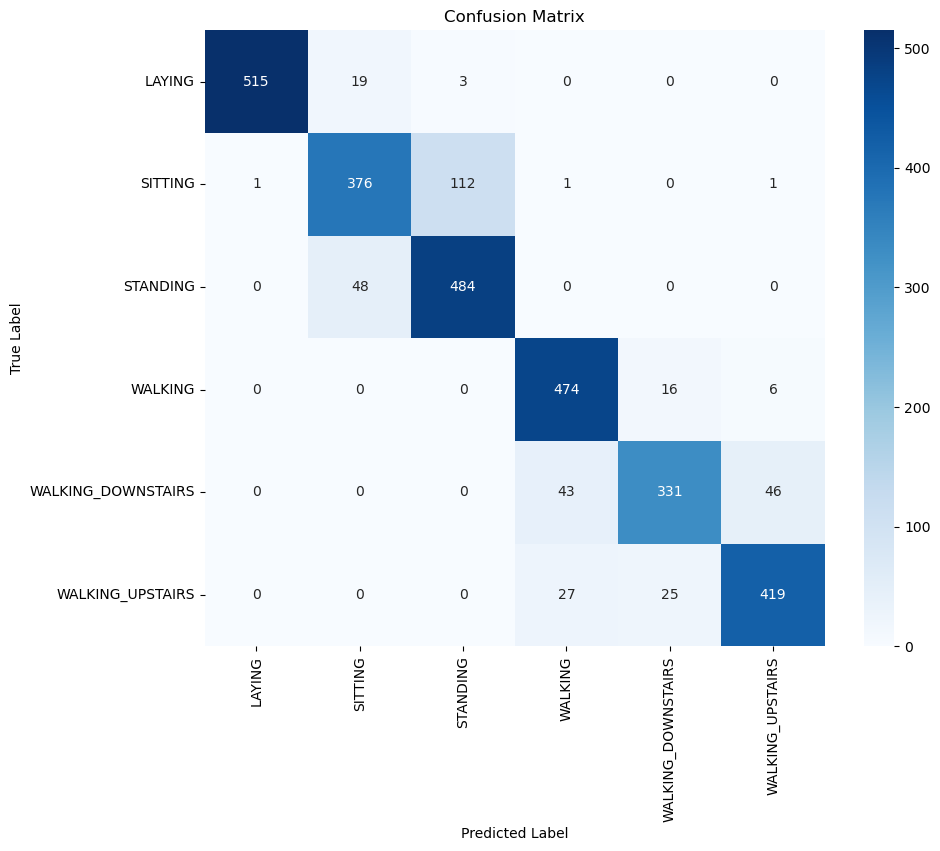

In [53]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Selection of Machine Learning Model

For this study, we selected a 1D Convolutional Neural Network (CNN) as our primary classification model. The decision to use CNN was based on the following considerations:

1. Pattern Extraction from Features: Since our dataset was transformed using Principal Component Analysis (PCA), the resulting features maintain structured relationships. CNNs are effective at capturing spatial dependencies, even in non-image data.
2. Efficiency Compared to LSTMs: While recurrent models like LSTMs are commonly used for sequential data, CNNs can extract hierarchical feature representations more efficiently, reducing computation time.
3. Proven Performance in Similar Tasks: Prior research and practical applications have shown that CNNs perform well in tabular classification tasks, especially when dealing with high-dimensional data.

Model Architecture

The CNN model was structured as follows:

* Three 1D Convolutional Layers (Conv1D with ReLU activation) to capture important feature patterns.
* Batch Normalization after each convolution to stabilize training.
* MaxPooling Layers to reduce dimensionality and computational cost.
* Fully Connected Dense Layers with Dropout (0.5, 0.3) to prevent overfitting.
* Softmax Output Layer to predict multi-class outcomes.

The model was compiled using the Adam optimizer (learning_rate = 0.001) and the sparse_categorical_crossentropy loss function, which is ideal for multi-class classification with integer labels.

Training Methodology and Hyperparameter Tuning
* We trained the model for 50 epochs with a batch size of 32.
* Implemented Early Stopping to halt training when validation loss stopped improving, reducing overfitting.
* Used Learning Rate Reduction to fine-tune learning when performance plateaued.
* The number of filters (64 → 128 → 256) was chosen to progressively capture more abstract feature representations, and kernel size = 3 was selected for capturing fine-grained patterns.

Performance Metrics and Evaluation
* The trained model was evaluated using a Confusion Matrix and a Classification Report, measuring accuracy, precision, recall, and F1-score.
* These metrics provided insights into how well the model classified different outcome categories and helped assess potential misclassification patterns.

# Results and Discussion

**Model Performance Overview**

The 1D Convolutional Neural Network (CNN) was trained and tested to categorize human behaviors into six groups: walking, walking upstairs, walking downstairs, sitting, standing, and laying down. The model's ability to identify distinct movement patterns was evaluated using important performance indicators such as accuracy, precision, recall, and F1-score.


**Classification Metrics**

The results show that the model has an overall accuracy of 87% on the test set. 

* Laying had the best classification performance, with 99% accuracy and 96% recall, suggesting that the model was fairly good at properly recognizing this behavior.

* Walking and Standing also fared well, with a recall of more than 90% which indicates that the algorithm could recognize these behaviors consistently.

* Sitting and walking downstairs had somewhat lower recall rates with 74% and 78%, respectively, indicating potential misclassifications.

**PCA and CNN Architecture Efficacy**

The use of Principal Component Analysis (PCA) for dimensionality reduction dramatically increased computing efficiency while maintaining classification performance. The CNN architecture, with progressively increasing filters (64 → 128 → 256) and kernel size = 3, effectively captured hierarchical patterns inside the PCA-transformed feature space.

**Confusion Matrix Analysis**

* The majority of instances of LAYING were properly categorized (517). This implies that the model is extremely accurate for LAYING but may occasionally mistake it with other stationary behaviors such as sitting.
* For SITTING, there are 363 cases where it is appropriately categorized which implies that the sensor patterns for SITTING and STANDING overlap.
* STANDING has mostly accurately categorized 494 which means that the misunderstanding between SITTING and STANDING activities. 
* In WALKING, there is a high accuracy of 470 predictions that suggest minor confusion in identifying a flat ground and walking on stairs.
* In WALKING DOWNSTAIRS, 327 were classified correctly, however, they are 44 misclassified as WALKING indicating that there is a confusion between  WALKING and WALKING DOWNSTAIRS. Additionally, 48 were misclassified as WALKING UPSTAIRS, demonstrating the difficulty in discriminating between various stair-related activities.
* In WALKING UPSTAIRS, 397 were accurately categorized. Some were misclassified as WALKING and WALKING DOWNSTAIRS. This means difficulty in distinguishing between various walking-related activities.


The model performs well in recognizing LAYING, STANDING, and WALKING, indicating its ability to recognize certain motion patterns. However, it has difficulty discriminating between SITTING and STANDING," most likely due to their similar postures and restricted mobility.

This analysis demonstrates the model's ability to recognize activities with distinct motion signatures, such as LAYING, STANDING, and WALKING. Yet, its difficulty in distinguishing SITTING from STANDING may be due to subtle differences in sensor readings, as both activities involve minimal physical displacement and similar body positions.


**Overall Conclusion**

The results successfully demonstrated the capacity of a 1D CNN using PCA-transformed data to categorize sensor-human activities. The classification results show that the 1D CNN model can reliably classify human activities, with an overall accuracy of 87%. Furthermore, the macro and weighted averages for accuracy, recall, and F1-score are all 87%, indicating well-balanced performance across all six activity areas. These findings validate the CNN's ability to capture structured feature representations from high-dimensional data while being computationally efficient. Future recommendations might look into alternative machine or deep learning architectures and enhanced data augmentation methodologies to boost model resilience and accuracy. 

***
***